In [0]:
# train_image = ('/content/drive/My Drive/train-images-idx3-ubyte.gz')
# train_label = ('/content/drive/My Drive/train-labels-idx1-ubyte.gz')
# test_image = ('/content/drive/My Drive/t10k-images-idx3-ubyte.gz')
# test_label = ('/content/drive/My Drive/t10k-labels-idx1-ubyte.gz')

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Imports
import numpy as np
import keras
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D , Flatten, BatchNormalization
from keras import backend as K
from keras.datasets import mnist

In [12]:
# Training parameters
batch_size, num_classes, epochs = 128, 10, 20
img_rows, img_cols = 28, 28

# Load the MNIST data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()


if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)  

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print('x_train shape is:',x_train.shape)
print('train sample size is:',x_train.shape[0])
print('test sample size is:',x_test.shape[0])

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape is: (60000, 28, 28, 1)
train sample size is: 60000
test sample size is: 10000


In [13]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same', kernel_initializer= keras.initializers.glorot_normal(seed=0),input_shape=input_shape))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_initializer= keras.initializers.glorot_normal(seed=0), padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2,padding='same'))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',kernel_initializer= keras.initializers.glorot_normal(seed=0), padding='same'))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',kernel_initializer= keras.initializers.glorot_normal(seed=0), padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2),  strides=2,padding='same'))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',kernel_initializer= keras.initializers.glorot_normal(seed=0), padding='same'))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',kernel_initializer= keras.initializers.glorot_normal(seed=0), padding='same'))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',kernel_initializer= keras.initializers.glorot_normal(seed=0), padding='same'))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',kernel_initializer= keras.initializers.glorot_normal(seed=0), padding='same'))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',kernel_initializer= keras.initializers.glorot_normal(seed=0), padding='same'))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',kernel_initializer= keras.initializers.glorot_normal(seed=0), padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2,padding='same'))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',kernel_initializer= keras.initializers.glorot_normal(seed=0), padding='same'))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',kernel_initializer= keras.initializers.glorot_normal(seed=0), padding='same'))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',kernel_initializer= keras.initializers.glorot_normal(seed=0), padding='same'))
model.add(BatchNormalization(axis=-1))

model.add(MaxPooling2D(pool_size=(2, 2), strides=2,padding='same'))


model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

keras.utils.plot_model(model, to_file='vggnet16.png')
model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_14 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_15 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
batch_normalization_16 (Batc (None, 14, 14, 128)      

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 36s 658us/step - loss: 0.4209 - accuracy: 0.8986 - val_loss: 1.5355 - val_accuracy: 0.6923
Epoch 2/20
54000/54000 [==============================] - 33s 605us/step - loss: 0.0557 - accuracy: 0.9847 - val_loss: 0.0393 - val_accuracy: 0.9888
Epoch 3/20
54000/54000 [==============================] - 33s 604us/step - loss: 0.0336 - accuracy: 0.9901 - val_loss: 0.0318 - val_accuracy: 0.9918
Epoch 4/20
54000/54000 [==============================] - 33s 605us/step - loss: 0.0228 - accuracy: 0.9930 - val_loss: 0.0267 - val_accuracy: 0.9937
Epoch 5/20
54000/54000 [==============================] - 33s 603us/step - loss: 0.0175 - accuracy: 0.9947 - val_loss: 0.0275 - val_accuracy: 0.9930
Epoch 6/20
54000/54000 [==============================] - 33s 603us/step - loss: 0.0137 - accuracy: 0.9963 - val_loss: 0.0302 - val_accuracy: 0.9932
Epoch 7/20
54000/54000 [==============================] -

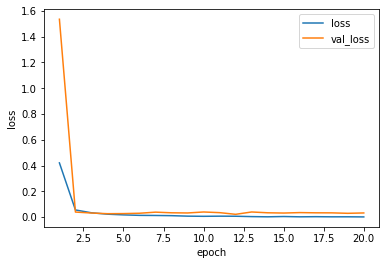

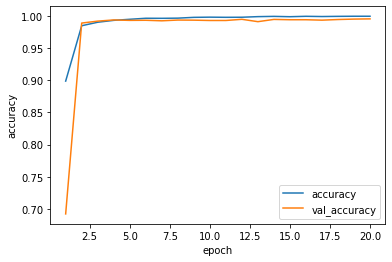

In [14]:
# from keras.optimizers import Adam
# opt = Adam(lr=0.001)
# model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

output = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=.1)
score = model.evaluate(x_test, y_test, verbose=0)
print('The test loss:', score[0])
print('The test accuracy:', score[1])
loss= output.history['loss']
valloss= output.history['val_loss']
acc= output.history['accuracy']
valacc= output.history['val_accuracy']

plt.plot(np.linspace(1,epochs,epochs),loss,label="loss")
plt.plot(np.linspace(1,epochs,epochs),valloss,label="val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

plt.plot(np.linspace(1,epochs,epochs),acc,label="accuracy")
plt.plot(np.linspace(1,epochs,epochs),valacc,label="val_accuracy")

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

